# Explore Training Curves

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)

In [74]:
def find_moving_avg(data, window_size):
    if data.shape[0] == 1:
        quantile1 = np.zeros(data.shape[1]-window_size)
        quantile2 = np.zeros(data.shape[1]-window_size)
        avg = np.zeros(data.shape[1]-window_size)
        for i in range(data.shape[1]-window_size):
            avg[i] = np.mean(data[0,i:i+window_size])
            quantile1[i] = np.quantile(data[0,i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[0,i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(data.shape[1]-window_size)
        smoothed_std = np.zeros(data.shape[1]-window_size)
        # smooth 
        for i in range(data.shape[1]-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-smoothed_std, smoothed_avg+smoothed_std
            

def df_plot(dfs, x, y, isTaxi, isChain, isCliff, ylim=None, xlim=None, legend_loc='best'):
    """ Plot y vs. x curves from pandas dataframe(s)

    Args:
        dfs: list of pandas dataframes
        x: str column label for x variable
        y: str column label for y variable
        ylim: tuple to override automatic y-axis limits
        xlim: tuple to override automatic x-axis limits
        legend_loc: str to override automatic legend placement:
            'upper left', 'lower left', 'lower right' , 'right' ,
            'center left', 'center right', 'lower center',
            'upper center', and 'center'
    """
    if ylim is not None:
        plt.ylim(ylim)
    if xlim is not None:
        plt.xlim(xlim)
        
    n = len(dfs)
    ws = 5
    if isTaxi == True:
        min_len = 84
        timesteps_per_eps = 100
        timesteps_per_eps_wass = 70
        y_val = np.zeros((n,84))
        plt.title('Taxi', fontsize = 26)
    if isChain == True:
        min_len = 500
        timesteps_per_eps = 200
        timesteps_per_eps_wass = 200
        y_val = np.zeros((n,500))
        ws = 30
        plt.title('Chain', fontsize = 26)
    if isCliff == True:
        min_len = 1000
        y_val = np.zeros((n,1000))
        timesteps_per_eps = 50
        timesteps_per_eps_wass = 50
        plt.title('Cliff', fontsize = 26)
    
    i = 0
    for df, name in dfs:
        if 'Wass' in name:
            name = 'WPO'
        elif 'Sinkhornlogt'in name:
            name = 'SPO ($\lambda \sim \log{t}$)'
        elif 'Sinkhornt2'in name:
            name = 'SPO ($\lambda \sim t^2$)'
        elif 'Sinkhornt'in name:
            name = 'SPO ($\lambda \sim t$)'
        x_val = df[x]
        y_val[i,:] = df[y].values.ravel()[0:min_len]
        i += 1
                
    moving_average = find_moving_avg(y_val, ws)
    if name == 'WPO':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps_wass/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:orange')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps_wass/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:orange')
    if name == 'SPO ($\lambda$ = 20)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:blue')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:blue')
    if name == 'SPO ($\lambda$ = 50)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:pink')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:pink')
    if name == 'SPO ($\lambda$ = 2)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:green')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:green')
    if name == 'SPO ($\lambda$ = 3)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:olive')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:olive')
    if name == 'SPO ($\lambda$ = 5)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000*0.85, moving_average[0], linewidth = 2.5, label=name, color = 'tab:cyan')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000*0.85, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:cyan')
    if name == 'SPO ($\lambda \sim t$)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:cyan')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:cyan')
    if name == 'SPO ($\lambda \sim \log{t}$)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:gray')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:gray')
    if name == 'SPO ($\lambda \sim t^2$)':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label=name, color = 'tab:pink')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:pink')

    plt.xticks(fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.axis((None,None,None,None))
    plt.xlabel('            Timesteps       '+ r'$\times 10^5$',fontsize=22)
    plt.ylabel('Average Return',fontsize=22)

In [114]:
isTaxi = True
isChain = False
isCliff = False


# ENTER LIST OF LOG FILENAMES HERE:
if isChain:
    wass_path = ['new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_07:58:22/log.csv',
                 'new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_08:05:03/log.csv',
                 'new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Feb-19_01:56:20/log.csv']
    sink2_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn2_Batch=1/Feb-06_00:29:43/log.csv',
                  'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn2_Batch=1/Feb-06_00:35:56/log.csv']
    sink20_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn20_Batch=1/Feb-06_00:17:22/log.csv']
    sink50_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn50_Batch=1/Feb-20_07:36:15/log.csv',
                   'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn50_Batch=1/Feb-20_07:48:50/log.csv']
    sink1overt_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn1overt_Batch=1/Nov-15_01:09:44/log.csv',
                       'new_log_files/different_lambdas/NChain-v0_DR-Sinkhorn1overt_Batch=1/Nov-15_01:36:12/log.csv']
    sinklogt_path = ['new_log_files/different_lambdas/NChain-v0_DR-Sinkhornlogt_Batch=1/Nov-15_01:20:50/log.csv']
    
if isTaxi: 
    wass_path = ['archive_logs/Taxi-v3_DR-Wass_Batch=60/Feb-11_01:20:04/log.csv', 
                 'archive_logs/Taxi-v3_DR-Wass_Batch=60/Feb-22_01:40:39/log.csv',
                 'new_log_files/Taxi-v3_DR-Wass_Batch=60/Apr-09_23:05:13/log.csv']
    sink1overt_path = ['new_log_files/different_lambdas/Taxi-v3_DR-Sinkhorn1overt_Batch=60/Nov-18_23:53:40/log.csv',
                       'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhorn1overt_Batch=60/Nov-19_00:04:15/log.csv']
    sinklogt_path = ['new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornlogt_Batch=60/Nov-22_04:06:10/log.csv',
                     'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornlogt_Batch=60/Nov-22_04:02:03/log.csv']
    sinkt_path = ['new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornt_Batch=60/Nov-22_04:29:39/log.csv',
                  'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornt_Batch=60/Nov-22_04:38:02/log.csv']
    sinkt2_path = [
#                    'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornt2_Batch=60/Nov-22_05:35:31/log.csv',
#                    'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornt2_Batch=60/Nov-22_05:24:54/log.csv',
                   'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornt2_Batch=60/Nov-22_05:30:31/log.csv',
                   'new_log_files/different_lambdas/Taxi-v3_DR-Sinkhornt2_Batch=60/Nov-22_05:43:46/log.csv']

if isChain:
    wass_dataframes = []
    wass_names = []
    for filepath in wass_path:
        wass_names.append(filepath)
        wass_dataframes.append(pd.read_csv(filepath))
    wass_data = list(zip(wass_dataframes, wass_names))

    sink2_dataframes = []
    sink2_names = []
    for filepath in sink2_path:
        sink2_names.append(filepath)
        sink2_dataframes.append(pd.read_csv(filepath))
    sink2_data = list(zip(sink2_dataframes, sink2_names))

    sink20_dataframes = []
    sink20_names = []
    for filepath in sink20_path:
        sink20_names.append(filepath)
        sink20_dataframes.append(pd.read_csv(filepath))
    sink20_data = list(zip(sink20_dataframes, sink20_names))

    sink50_dataframes = []
    sink50_names = []
    for filepath in sink50_path:
        sink50_names.append(filepath)
        sink50_dataframes.append(pd.read_csv(filepath))
    sink50_data = list(zip(sink50_dataframes, sink50_names))
    
    sink1overt_dataframes = []
    sink1overt_names = []
    for filepath in sink1overt_path:
        sink1overt_names.append(filepath)
        sink1overt_dataframes.append(pd.read_csv(filepath))
    sink1overt_data = list(zip(sink1overt_dataframes, sink1overt_names))
    
    sinklogt_dataframes = []
    sinklogt_names = []
    for filepath in sinklogt_path:
        sinklogt_names.append(filepath)
        sinklogt_dataframes.append(pd.read_csv(filepath))
    sinklogt_data = list(zip(sinklogt_dataframes, sinklogt_names))
    
if isTaxi:
    wass_dataframes = []
    wass_names = []
    for filepath in wass_path:
        wass_names.append(filepath)
        wass_dataframes.append(pd.read_csv(filepath))
    wass_data = list(zip(wass_dataframes, wass_names))
    
    sink1overt_dataframes = []
    sink1overt_names = []
    for filepath in sink1overt_path:
        sink1overt_names.append(filepath)
        sink1overt_dataframes.append(pd.read_csv(filepath))
    sink1overt_data = list(zip(sink1overt_dataframes, sink1overt_names))
    
    sinklogt_dataframes = []
    sinklogt_names = []
    for filepath in sinklogt_path:
        sinklogt_names.append(filepath)
        sinklogt_dataframes.append(pd.read_csv(filepath))
    sinklogt_data = list(zip(sinklogt_dataframes, sinklogt_names))
    
    sinkt_dataframes = []
    sinkt_names = []
    for filepath in sinkt_path:
        sinkt_names.append(filepath)
        sinkt_dataframes.append(pd.read_csv(filepath))
    sinkt_data = list(zip(sinkt_dataframes, sinkt_names))
    
    sinkt2_dataframes = []
    sinkt2_names = []
    for filepath in sinkt2_path:
        sinkt2_names.append(filepath)
        sinkt2_dataframes.append(pd.read_csv(filepath))
    sinkt2_data = list(zip(sinkt2_dataframes, sinkt2_names))

# Plots

In [115]:
def find_baseline_moving_avg(file_list, window_size):  
    if len(file_list) == 1:
        df=pd.read_csv(file_list[0], sep=',', skiprows = 0, header= 1)
        data = df['r']
        quantile1 = np.zeros(len(data)-window_size)
        quantile2 = np.zeros(len(data)-window_size)
        avg = np.zeros(len(data)-window_size)
        for i in range(len(data)-window_size):
            avg[i] = np.mean(data[i:i+window_size])
            quantile1[i] = np.quantile(data[i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        # find minimum length
        min_len = 1e7
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            y_val = df['r']
            cur_len = len(y_val)
            if cur_len < min_len:
                min_len = cur_len
        data = np.zeros((len(file_list), min_len))
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            data[i,:] = df['r'].values.ravel()[0:min_len]
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(min_len-window_size)
        smoothed_std = np.zeros(min_len-window_size)
        # smooth 
        for i in range(min_len-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-smoothed_std, smoothed_avg+smoothed_std

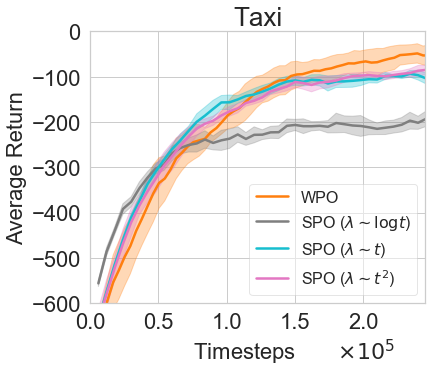

In [116]:
if isTaxi:
    xlim = 2.45
    ylim = -600
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim])
    df_plot(sink1overt_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim])
    df_plot(sinklogt_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim])
    df_plot(sinkt_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim])
    df_plot(sinkt2_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim])
if isChain:
    ylim = 1000
    xlim = 0.5
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim])
    df_plot(sink2_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim])
    df_plot(sink20_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim])
    df_plot(sink50_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim])
    df_plot(sink1overt_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim])
    df_plot(sinklogt_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim])
    
if isCliff:
    xlim = 0.3
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-3000,100], [0,0.3])

plt.rcParams["legend.framealpha"] = 0.5
plt.legend(fontsize= 16, loc='lower right', ncol = 1)